In [3]:
from shapely.geometry import Point, Polygon

def create_gravity_dam_mask(H, 
                            W, 
                            slope_up, 
                            slope_dn, 
                            ratio_up,
                            ratio_dn, 
                            Nx=200, 
                            Ny=200):
    """
    根据给定参数生成混凝土重力坝的二维蒙版。

    参数：
    ----------
    H : float
        坝高
    W : float
        坝顶宽度
    slope_up : float
        上游边坡（水平位移/竖向位移）
    slope_dn : float
        下游边坡（水平位移/竖向位移）
    ratio_up : float
        上游斜面占坝高的比例（0~1之间）
    ratio_dn : float
        下游斜面占坝高的比例（0~1之间）
    Nx, Ny : int
        x 和 y 方向网格离散数

    返回：
    ----------
    mask : 2D numpy array of shape (Ny, Nx)
        布尔型蒙版，True/1 表示网格点位于坝体内部，False/0 表示外部
    X : 1D numpy array of shape (Nx,)
        x方向坐标序列
    Y : 1D numpy array of shape (Ny,)
        y方向坐标序列
    """

    # --- 1. 计算多边形顶点 ---
    # 上游侧底脚点和分段点的 x 坐标
    x1 = - slope_up * (1 - ratio_up) * H
    x2 = W + slope_dn * ratio_dn * H

    # 顶点按逆时针方向
    P1 = (x1, 0.0)                         # 上游侧底脚点
    P2 = (0.0, ratio_up * H)                # 上游侧分段点
    P3 = (0.0, H)                          # 坝顶左上角
    P4 = (W,   H)                          # 坝顶右上角
    P5 = (W, ratio_dn * H)                 # 下游侧分段点
    P6 = (x2, 0.0)                         # 下游侧底脚点

    dam_polygon = Polygon([P1, P2, P3, P4, P5, P6])
    return dam_polygon

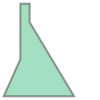

In [5]:
# 示例调用
H = 50           # 坝高
W = 5            # 坝顶宽
slope_up = 0.3   # 上游边坡
slope_dn = 0.6   # 下游边坡
ratio_up = 0.4   # 上游斜面占坝高的比例
ratio_dn = 0.8   # 下游斜面占坝高的比例
Nx, Ny = 200, 200

dam_polygon = create_gravity_dam_mask(H, W, slope_up, slope_dn, ratio_up, ratio_dn, Nx, Ny)
dam_polygon

In [8]:
dam_polygon.bounds

(-9.0, 0.0, 29.0, 50.0)